# Water Quality Prediction

## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data Analysis

In [3]:
df.shape

(3276, 10)

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
ph                 2785 non-null float64
Hardness           3276 non-null float64
Solids             3276 non-null float64
Chloramines        3276 non-null float64
Sulfate            2495 non-null float64
Conductivity       3276 non-null float64
Organic_carbon     3276 non-null float64
Trihalomethanes    3114 non-null float64
Turbidity          3276 non-null float64
Potability         3276 non-null int64
dtypes: float64(9), int64(1)
memory usage: 256.0 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [7]:
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

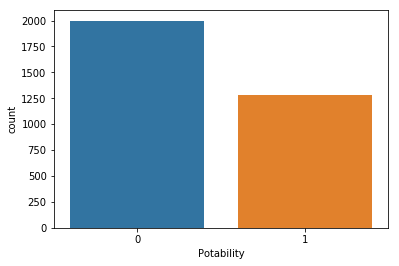

In [9]:
sns.countplot(df['Potability'])
plt.show()

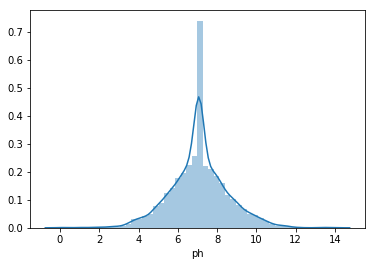

In [11]:
sns.distplot(df['ph'])
plt.show()

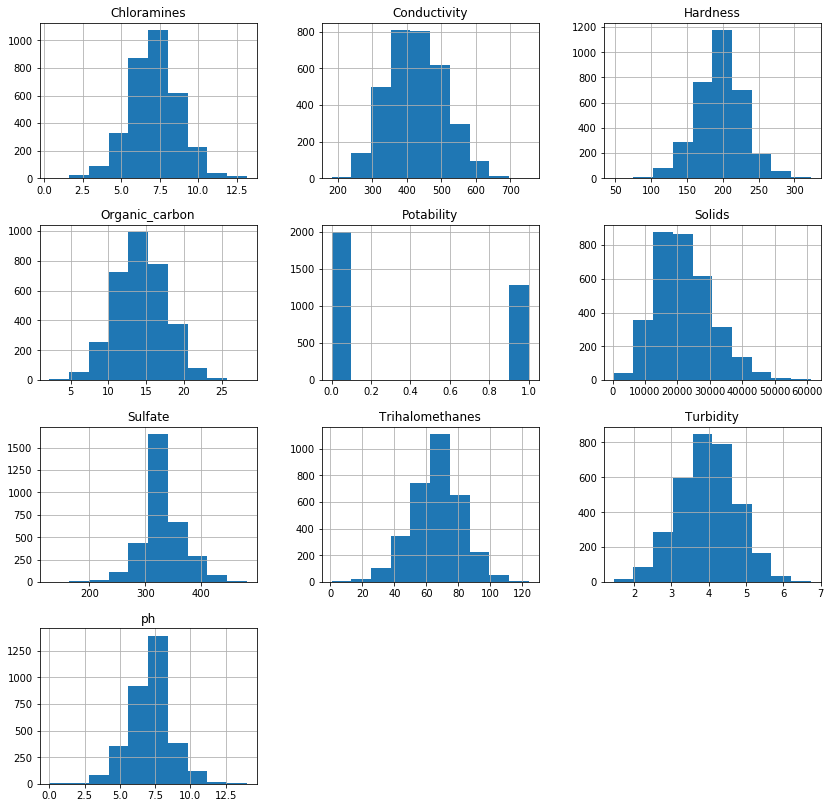

In [12]:
df.hist(figsize=(14,14))
plt.show()

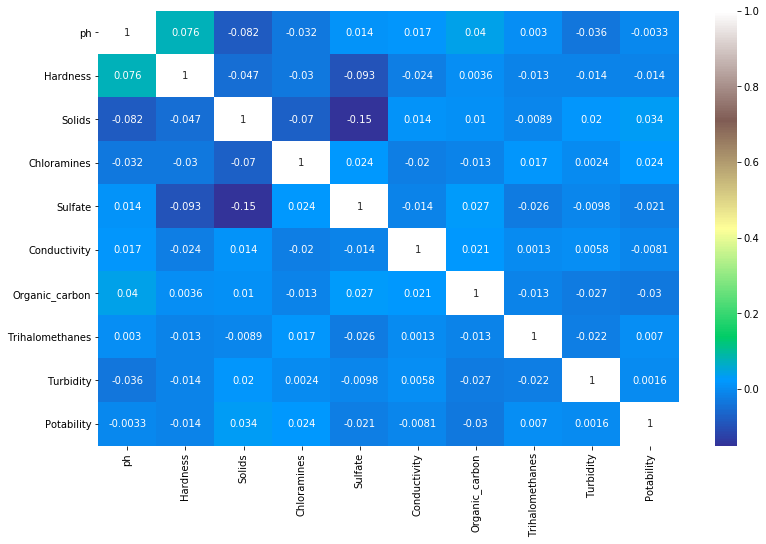

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

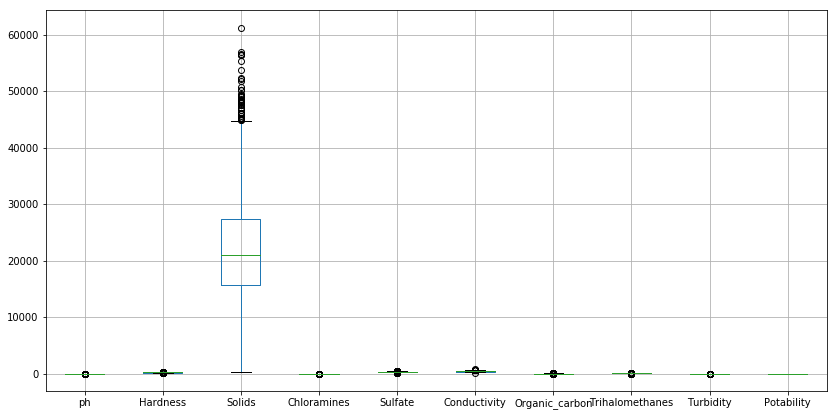

In [14]:
df.boxplot(figsize=(14,7))

In [16]:
X = df.drop('Potability',axis=1)
Y= df['Potability']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

## Train Decision Tree Classifier and check accuracy

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
prediction=dt.predict(X_test)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")


Accuracy Score = 59.60365853658537
Confusion Matrix =
 [[279 123]
 [142 112]]
Classification Report =
               precision    recall  f1-score   support

           0       0.66      0.69      0.68       402
           1       0.48      0.44      0.46       254

   micro avg       0.60      0.60      0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.59       656



In [20]:
res = dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
res

1

## Apply Hyper Parameter Tuning

In [24]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x00000187400022E8>,
       error_score=0,
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")
    
print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.595 using {'criterion': 'gini', 'min_samples_split': 12, 'splitter': 'best'}
0.592 (0.031) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.573 (0.028) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.592 (0.036) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.584 (0.024) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.594 (0.032) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.575 (0.026) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.593 (0.034) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.585 (0.032) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.594 (0.030) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.585 (0.032) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.595 (0.028) with: {'criterion': 'gini', '